Develop a linear regression model to predict house price based on features such as the number of rooms, location, size and other relevant factors. Collect a suitable dataset from Kaggle, preprocess it, and train the model to make accurate predictions.


Saving housing.csv to housing (4).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

📌 Available Columns in Dataset:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean

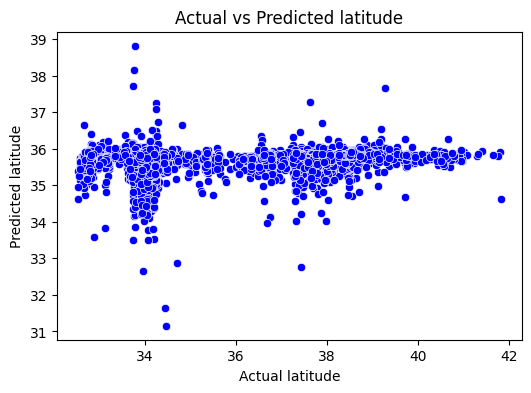

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from difflib import get_close_matches

# Upload dataset
uploaded = files.upload()  # User uploads a CSV dataset

# Read dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Display dataset info
print(df.info())
print("\n Available Columns in Dataset:\n", df.columns)

# Automatic Column Detection
expected_features = ['size', 'rooms', 'location']  # Expected keywords for feature columns
expected_target_keywords = ['price', 'value', 'cost']  # Keywords for detecting price column

# Function to find best matching column names
def find_best_match(expected, available_columns):
    match = get_close_matches(expected, available_columns, n=1, cutoff=0.4)  # Adjust cutoff if needed
    return match[0] if match else None

# Find best matches for features
feature_columns = [find_best_match(col, df.columns) for col in expected_features]
feature_columns = [col for col in feature_columns if col]  # Remove None values

# Find best matching target column (price-related)
target_column = None
for keyword in expected_target_keywords:
    match = find_best_match(keyword, df.columns)
    if match:
        target_column = match
        break

# If no price column is found, choose another numerical column
if not target_column:
    print(" No matching column found for price. Selecting another numeric column for prediction...")
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove feature columns from target selection
    available_targets = [col for col in numeric_columns if col not in feature_columns]

    if available_targets:
        target_column = available_targets[0]  # Pick the first available numeric column
        print(f" Predicting: {target_column}")
    else:
        raise KeyError("No suitable numerical column found for prediction.")

print(f"\n Automatically Selected Feature Columns: {feature_columns}")
print(f" Automatically Selected Target Column: {target_column}")

# Data Preprocessing
df.dropna(axis=1, thresh=len(df) * 0.8, inplace=True)  # Drop columns with too many missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing values with median

# Convert categorical columns using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Select features and target variable
X = df[feature_columns]
y = df[target_column]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.4f}")

# Visualizing Predictions
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel(f"Actual {target_column}")
plt.ylabel(f"Predicted {target_column}")
plt.title(f"Actual vs Predicted {target_column}")
plt.show()

